# Image Classification Project
- Author: Vaibhav Gupta

In [2]:
import numpy as np
import pandas as pd
import random
from mlxtend.data import loadlocal_mnist
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Loading the Data

In [3]:
random.seed(10)
data_original = pd.read_csv("dataset_aiml_task/data.csv")
data_original.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_original.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


## Understanding shape of Data
  
- Number of columns = Number of pixels + label = 785
- Number of rows = Number of grayscale images = 60,000
  
As the data is too big, we will take a sample of data of with 
10,000 training examples.

In [15]:
print("Shape of original data set:\n",data_original.shape)
# The dataset is too big, so I will use a smaller subset of it to explore and train on it. - due to limited memory.
data = data_original.sample(n=10000, random_state=10)
print("Shape of sample data set:\n",data.shape)


Shape of original data set:
 (60000, 785)
Shape of sample data set:
 (10000, 785)


## Dviding Data into feature set and Label set
  
X -> Features set (10000 X 784)  
y -> Label set (10000 X 1)

In [6]:
X = data.drop(['label'],axis=1)
Y = data['label']
print("First five elements of X are:\n", X.head()) 
print('The shape of X is:', X.shape)
print("-"*100)
print("First five elements of Y are:\n", Y.head()) 
print('The shape of Y is:', Y.shape)

First five elements of X are:
        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
4883        0       0       0       2       0       0       0       0       0   
28477       0       0       0       0       0       0       0       8      28   
8527        0       0       0       0       0       0       0       0       0   
38347       0       0       0       0       0       0       0       0       0   
3363        0       0       0       0       1       0       0       9      84   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
4883         0  ...        99       150         0        26       173   
28477        8  ...         0         0         0         0        75   
8527         0  ...         0         0         0         0         0   
38347        0  ...       156       175       213         0         0   
3363        49  ...       134       119        74        92        57   

       pixel780  pixel781  pixel782  pixel7

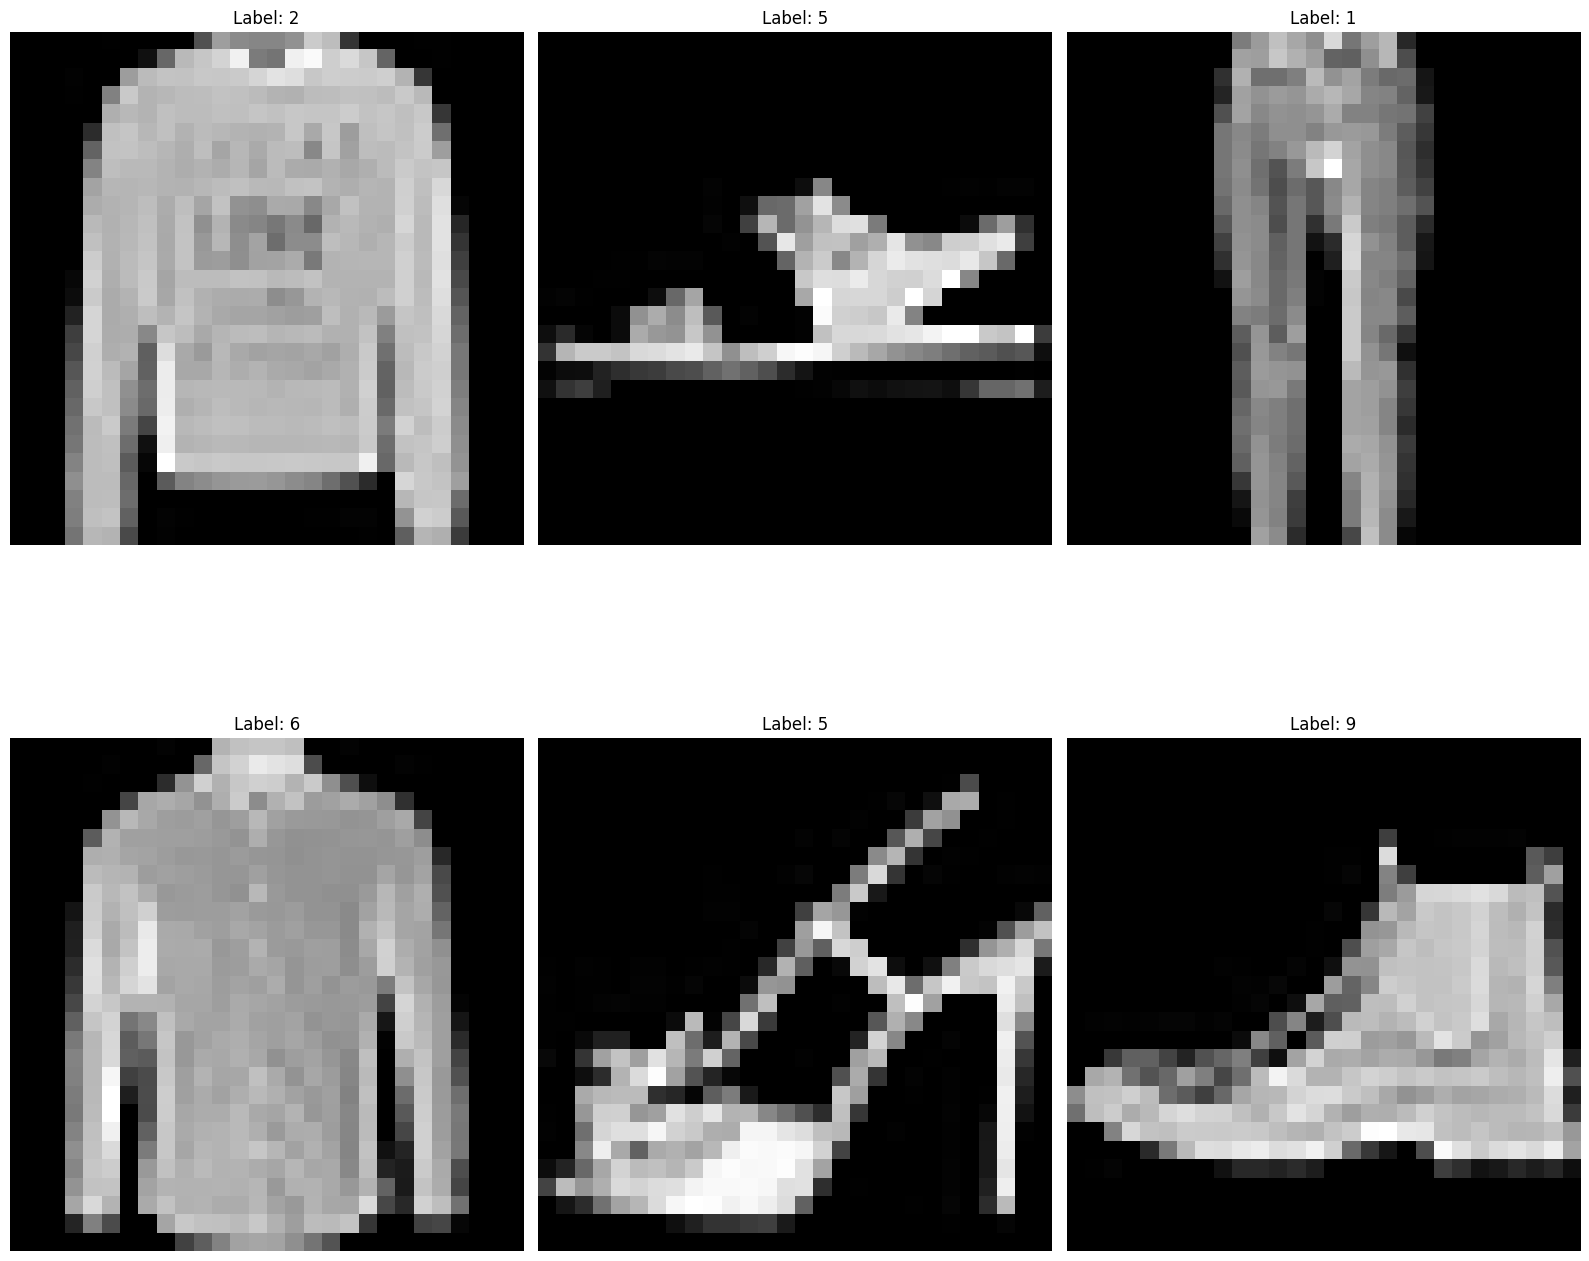

In [7]:
# Display the image
index = random.sample(range(10000), 6)
fig, ax = plt.subplots(2,3, figsize=(16,16))
plt.axis('off')
ax = ax.flatten()
for i in range(len(index)):
    label = Y.iloc[index[i]]  
    image = X.iloc[index[i]].values.reshape(28, 28) 
    ax[i].imshow(image, cmap='gray')
    ax[i].set_title(f"Label: {label}")
    ax[i].set_axis_off()
plt.tight_layout()
plt.show()


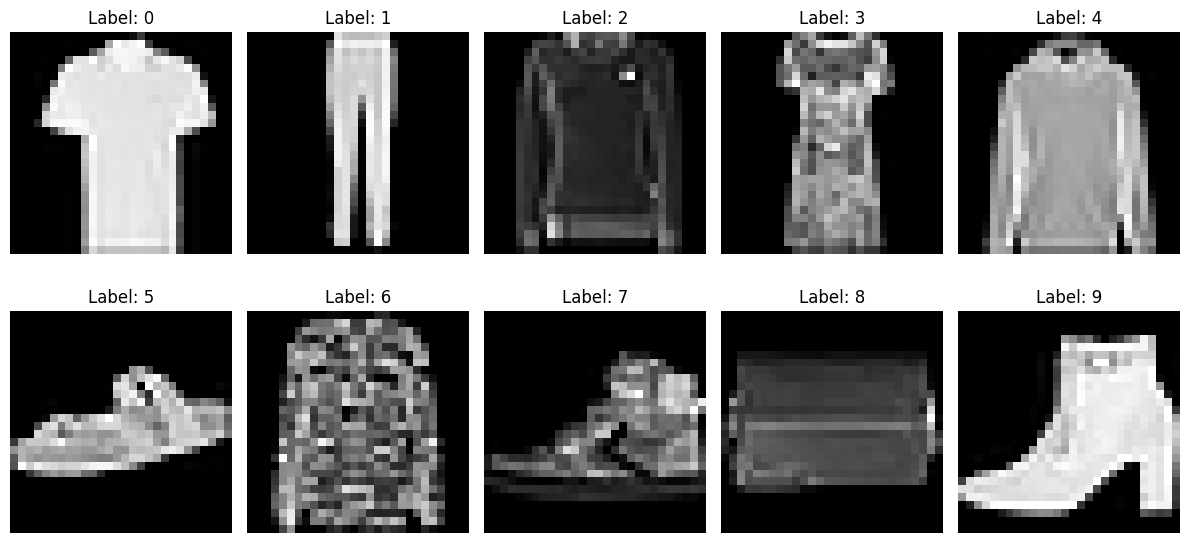

In [8]:
fig, ax = plt.subplots(2, 5, figsize=(12, 6))
ax = ax.flatten()  

for label in range(10):
    index = Y[Y == label].index[0]  # Get the first occurrence of each label
    image = X.loc[index].values.reshape(28, 28)  

    ax[label].imshow(image, cmap='gray')
    ax[label].set_title(f"Label: {label}")
    ax[label].axis('off')

plt.tight_layout()
plt.show()

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,InputLayer
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler

Accuracy: 0.8435

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       200
           1       0.97      0.98      0.97       207
           2       0.71      0.74      0.73       185
           3       0.88      0.82      0.85       218
           4       0.72      0.79      0.75       221
           5       0.97      0.91      0.94       180
           6       0.68      0.56      0.61       229
           7       0.92      0.93      0.92       190
           8       0.93      0.96      0.94       183
           9       0.92      0.95      0.94       187

    accuracy                           0.84      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.84      0.84      0.84      2000



c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


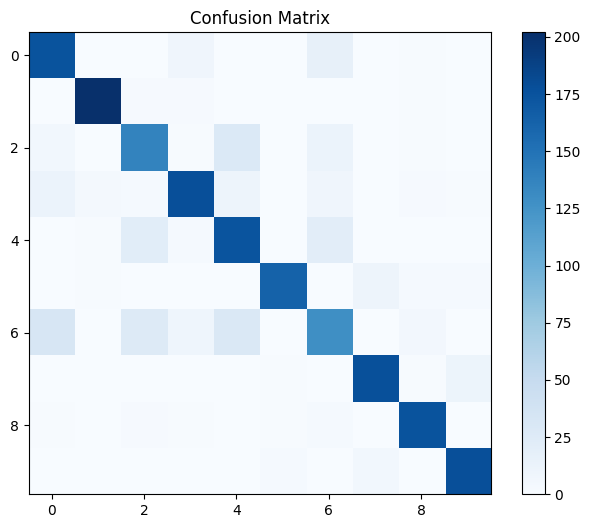

In [14]:
X = data.drop(['label'],axis=1)
Y = data['label']

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

# Train logistic regression model (using 'saga' solver for multi-class classification)
model = LogisticRegression(max_iter=200, solver='saga', multi_class='multinomial', n_jobs=-1)
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix(Y_test, Y_pred), cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title("Confusion Matrix")
plt.show()


Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5945 - loss: 1.5949 - val_accuracy: 0.7970 - val_loss: 0.5795
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8039 - loss: 0.5384 - val_accuracy: 0.8100 - val_loss: 0.5333
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8381 - loss: 0.4685 - val_accuracy: 0.8075 - val_loss: 0.5429
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8359 - loss: 0.4680 - val_accuracy: 0.8210 - val_loss: 0.5383
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8418 - loss: 0.4600 - val_accuracy: 0.8305 - val_loss: 0.4759
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8709 - loss: 0.3690 - val_accuracy: 0.8390 - val_loss: 0.4345
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8721 - loss: 0.3678 - val_accuracy: 0.8345 - val_loss: 0.4976
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8854 - loss: 0.3328 - val_accu

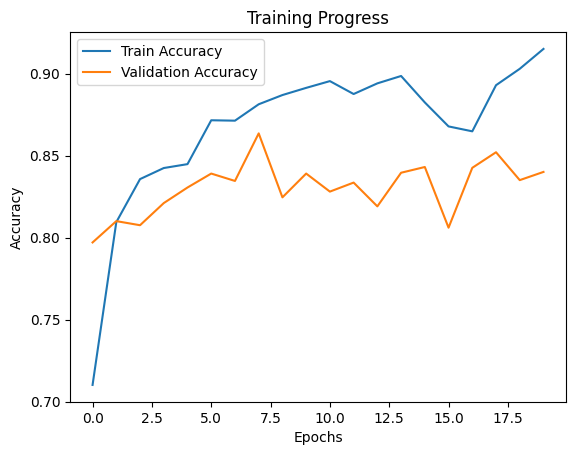

In [11]:
# Build Neural Network model

X = data.drop(['label'],axis=1)
Y = data['label']

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

model = Sequential([
    InputLayer((784,)),
    Dense(784, activation='relu'),   # First hidden layer
    Dense(512, activation='relu'),  # Second hidden layer
    Dense(256, activation='relu'),  # Third hidden layer
    Dense(128, activation='relu'),  # Fourth hidden layer
    Dense(10, activation='linear')  # Output layer (10 classes)
])

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.006), 
    loss=SparseCategoricalCrossentropy(from_logits=True), 
    metrics=['accuracy'])

# Train model
history = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_data=(X_test, Y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Progress')
plt.show()



In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,548,624 (13.54 MB)

 Trainable params: 1,182,874 (4.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,365,750 (9.02 MB)